<a href="https://colab.research.google.com/github/kdh2769/hello-world/blob/main/Chapter02_Tensorflow_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter02 Tensorflow Basic

**Tensorflow**는 연구원과 머신러닝 전문가가 사용하는 수학 라이브러리입니다.<br>
이를 이용하여 수치 연산을 수행할 수도 있지만, 대체로 심층 신경망을 훈련시키고 실행하는데 사용합니다.<br>

## Tensorflow 2와 Keras 시작하기
Tensorflow는 Google에서 연구원가 개발자가 머신러닝 연구를 수행하는 것을 지원하기 위해 개발하였습니다. 텐서플로의 주요 목적은 머신러닝 솔루션을 다양한 플랫폼(CPU, GPU, mobile, browser)에 간단히 배포하는 것입니다.<br>

## 텐서플로 주요 아키텍쳐 

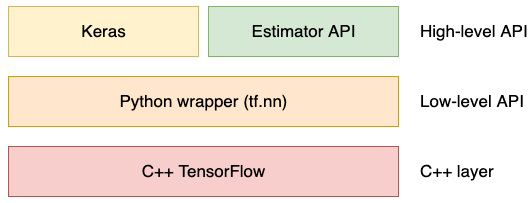

대부분의 딥러닝 계산은 C++로 코딩이 되어있습니다.<br> **GPU에서 이 계산을 실행하기 위해서 텐서플로는 NVIDIA에서 개발한 CUDA library를 이용합니다**<br>
Low level API에서는 python API가 소스를 감싸고 있습니다. python wrapper를 활용하면 사용이 쉽고 컴파일이 따로 필요하지 않아서 작업 효율이 좋아집니다. python wrapper는 matrix 곱셈, 덧셈 같은 기초적인 연산을 만들 수 있습니다<br>
High level API는 Keras와 Estimator API로 구성되어 있습니다. <br>
Estimator API는 머신러닝을 쉽게 구성할 수 있게 해주는 사전 제작된 구성요소들을 포함하고 있습니다.<br>
**Keras**에 관해서는 밑에서 자세히 소개하겠습니다

## Keras 소개
2015년 Keras는 신경망으로 가장 빨리 실험할 수 있게 지원하는 인터페이스로 설계되었습니다<br>
2017년 이후로는 텐서플로에 Keras가 통합되어서, 텐서플로만 설치해도 Keras를 이용할 수 있습니다.<br>

## Keras를 이용한 간단한 Computer vision 모델
MNIST 데이터셋을 Keras를 이용하여 숫자를 인식하는 문제를 풀어보겠습니다.<br><br>

### 데이터 준비
먼저 Keras에 있는 dataset을 import 해보겠습니다

In [ ]:
import tensorflow as tf

num_classes = 10
img_rows, img_cols = 28, 28
num_channels = 1
input_shape = (img_rows, img_cols, num_channels) # depth가 1인 tensor를 Input으로 해줍니다

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 # 0~255사이의 값을 0~1로 변환한다. (데이터의 정규화)

11493376/11490434 [==============================] - 0s 0us/step


### 모델 구성
실제 모델을 구성해보겠습니다. 2개의 FUlly connected layer로 구성된 단순한 아키텍쳐를 사용하겠습니다.

In [ ]:
model = tf.keras.models.Sequential() # 선형으로 모델을 쌓는다
model.add(tf.keras.layers.Flatten()) # Flatten layer를 추가
model.add(tf.keras.layers.Dense(128, activation='relu')) # Dense layer1를 추가한다
model.add(tf.keras.layers.Dense(num_classes, activation='relu')) # Dense layer2를 추가한다

- **Flatten layer(평면화 계층)**: 이 layer는 matrix를 1d vector로 전환합니다. 위 과정에서는 28X28크기의 이미지를 784크기의 벡터로 전환합니다<br>
- **Dense layer 1(밀집 계층)**: 이 layer는 784 pixel값을 128X784 크기의 가중치 행렬과 128 크기의 bias행렬을 사용하여 128개의 활성화 값으로 전환합니다.
- **Dense layer 2(밀집 계층)**: 이 layer는 dense layer1에서 얻은 128개의 활성화 값을 최종 예측 값으로 전환합니다. 이 때 **softmax**함수를 사용합니다.

model.summary()함수를 통해 모델의 설명, 출력, 가중치를 구할 수 있습니다

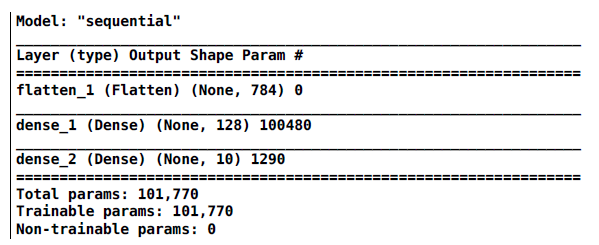

## 모델 훈련
Keras를 사용하면 훈련 과정이 매우 간단해집니다!

In [ ]:
# 먼저 모델을 compile합니다
# sgd 최적화 방법을 사용하고, 척도로는 정확도를 이용, 손실 함수로는 cross entropy를 사용하는 모델을 만듭니다
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

# 모델을 학습 시킵니다.
model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 3.5970 - accuracy: 0.1738 - val_loss: 3.7328 - val_accuracy: 0.2174
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.7422 - accuracy: 0.2103 - val_loss: 3.7377 - val_accuracy: 0.2108
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.7421 - accuracy: 0.2177 - val_loss: 3.7622 - val_accuracy: 0.2246
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.7184 - accuracy: 0.2081 - val_loss: 3.7800 - val_accuracy: 0.1032
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.7666 - accuracy: 0.0993 - val_loss: 3.7800 - val_accuracy: 0.1032


- optimizer: Sophistic Gradient Descent 방법을 이용하여 최적화를 수행합니다<br>
- Loss: crosee-entropy 함수를 cost function으로 사용합니다<br>
- Metric: 훈련하는 동안 모델의 성능을 시각적으로 보여주기 위해 사용하는 일종의 척도이다. accuracy는 정확도를 척도로 평가한다는 이야기입니다<br>

**sparse_categorical_crossentropy와 categorical_crossentropy의 차이점으로는 동일한 연산을 수행하지만, 전자는 실제 레이블을 입력으로 받는 반면에 후자는 실제 레이블을 one-hot encoding된 상태로 받습니다.**<br>
따라서 sparse를 사용하면 따로 label을 one-hot encding을 해 줄 필요가 없습니다!<br>
- fit함수: 모델을 훈련시키는 함수입니다. 이 함수는 Keras에 내장되어 있으며, scikit-learn에서도 찾아볼 수 있습니다.<br>
- verbose: 만약 verbose가 1인 경우 모델이 학습을 하는 진행과정을 표시해줍니다<br>
 

## 모델의 성능
model의 hyper paremeter를 조정하여 보다 좋은 정확도를 얻을 수 있습니다.<br>
또한 모델의 성능을 개선하는 알고리즘들도 다양하게 존재합니다<br>

## Tensorflow2와 Keras 자세하게 살펴보기

### 핵심 개념

---


**1) Tensor**<br>
**텐서는 N차원 배열이라 생각하면 됩니다.**<br>
스칼라나 벡터, 3차원 행렬, N차원 행렬 모두 텐서가 될 수 있습니다<br>
Tensor 객체는 수치 값을 저장하기 위하여 사용됩니다. 여기에는 고정값(tf.constant)와 변경되는 값(tf.Variable)을 모두 포함할 수 있습니다<br>
Tensor 객체는 다음 요소를 갖추고 있습니다<br>
- **타입(Type): string, float32, float16, int8등이 있습니다**<br>
- **형상(Shape): 데이터의 차원을 의미합니다. ()이면 schalar, (n)이면 크기가 n인 vector, (n, m)이면 크기가 nXm인 2차원 matrix입니다**<br>
- **순위(Rank): 차원 개수, 0이면 Schalar, 1이면 vector, 2이면 2차원 행렬입니다**<br>


---

**2) Tensorflow graph**<br>
Tensorflow는 입력과 출력으로 Tensor를 사용합니다.<br>
입력을 출력으로 변환하는 것을 **Operation**이라 합니다<br>
Tensorflow는 그래프를 사용해 연산을 표현하는데, tf2에서부터는 framework를 보다 잘 사용할 수 있게 그래프 작업을 내부로 감추었습니다<br>
실제로 Keras를 사용해 위의 예제를 학습을 할 때, Tensorflow는 실제로 아래와 같이 그래프를 구성합니다<br>
Tensorflow2에서부터는 사용자가 더이상 그래프를 생성하지 않아도 되는 장점이 있습니다<br>

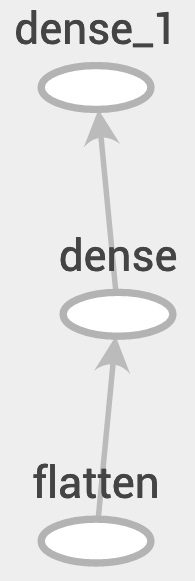



---

**3) eager e& lazy execution**<br>
텐서플로 2에서는 조급한 실행(eager execution)이 가장 많이 변하였습니다. 기존 텐서플로 1에서는 느긋한 실행(lazy execution = framework에 구체적으로 요청할 때까지 연산이 실행되지 않습니다)을 사용했습니다. 아래 예는 연산이 실행되어 결과(Tensor)에 반영되는 조급한 실행입니다<br>

In [ ]:
import tensorflow as tf
 
a = tf.constant([1, 2, 3])
b = tf.constant([0, 0, 1])
c = tf.add(a, b)

print(c)

tf.Tensor([1 2 4], shape=(3,), dtype=int32)


### Tensorflow2에서 그래프 생성

In [ ]:
def compute(a,b,c):
  d = a * b + c
  e = a * b * c
  return d, e

만약 a, b, c가 모두 tensor라고 가정하면 이 코드는 2개의 새로운 값 d와 e를 계산합니다.<br>
조급한 실행 모드에서는, d를 계산한 다음 e를 게산합니다<br>
반면에 느긋한 실행 모드를 사용하면 연산 그래프를 생성합니다.<br>
결과를 얻기 위해 그래프를 실행하기 전, 그래프 최적화기(graph optimizer)가 실행됩니다<br>



---

## Tensorflow autograph와 tf.function 소개

autograph모듈은 자동 최적화를 가능하게 함으로써 조급한 실행 코드를 그래프로 변환하기 쉽게 만듭니다. 이 과정을 가장 쉽게 하는 방법은 함수의 맨 앞에 tf.function 데코레이터를 추가하는 것입니다<br>

In [ ]:
@tf.function # decorator: 함수를 감싸고, 함수에 기능을 추가하거나 변경하는 것이 가능하게 해주는 개념
def compute(a,b,c):
  d = a * b + c
  e = a * b * c
  return d ,e

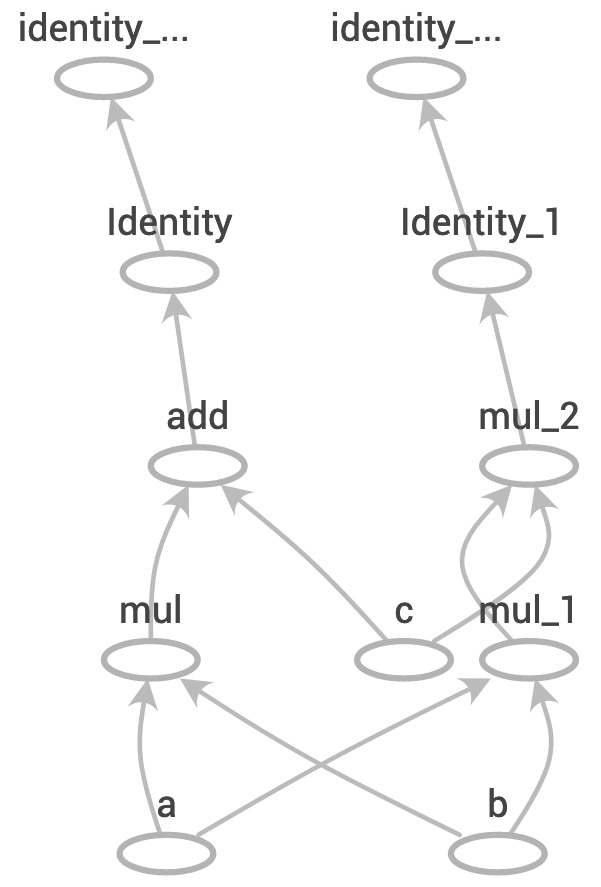



---
## Gradient tape를 사용하여 오차 역전파하기(backpropagation)
gradient tape를 사용하여 조급한 실행 모드에서 역전파를 쉽게 할 수 있습니다<br>
A x X = B(A,B는 상수)에서 X를 찾아야 하는 예제가 있다고 해봅시다<br>
이를 위해서는 loss(= abs(AxX-B))를 최소화 해야 합니다<br>


In [ ]:
A, B = tf.constant(3.0), tf.constant(6.0)
X = tf.Variable(20.0) # 20.0은 random 값입니다
loss = tf.math.abs(A * X - B) 

X값을 update하기 위해서는 X에 대한 gradient값을 계산해야 합니다. 먼저 loss를 출력해봅시다

In [ ]:
print(loss)

tf.Tensor(54.0, shape=(), dtype=float32)


조급한 실행 모드에서 텐서플로는 연산을 저장하는 대신 작업 결과를 계산합니다<br>
따라서 연산과 그 연산에 대한 정보가 없으면 loss를 미분할 수 없습니다<br>
이를 해결하는 방법으로는 **tf.GradientTape에서 자동으로 모든 연산을 기록하고 역으로 이 모든 연산을 재생합니다**<br>

In [ ]:
def train_step():
  with tf.GradientTape() as tape:
    loss = tf.math.abs(A * X - B)
  dx = tape.gradient(loss, X)
  print('X= {:2f}, dX = {:2f}'.format(X.numpy(), dx))
  X.assign(X - dx)

for i in range(7):
  train_step()

X= 20.000000, dX = 3.000000
X= 17.000000, dX = 3.000000
X= 14.000000, dX = 3.000000
X= 11.000000, dX = 3.000000
X= 8.000000, dX = 3.000000
X= 5.000000, dX = 3.000000
X= 2.000000, dX = 0.000000


위와 같이 train_step이 호출될 때마다 손실이 gradient tape의 context에서 계산되는 것을 볼 수 있습니다<br>


---
## Keras 모델과 계층
앞서 Model을 직접 구성했었습니다. 그 결과로 얻은 ``Model``객체에는 유용한 method와 속성이 포함되어 있습니다.<br>
- input&output : 모델의 입/출력<br>
- layers: 모델의 계층과 형상 목록<br>
- summary(): 모델의 아키텍쳐를 출력<br>
- save(): train에서 모델, 아키텍쳐의 현 상태를 저장한다. 나중에 훈련을 재개할 때 매우 유용하다. ``tf.keras.models.load_model()``을 사용해 file로부터 instance화 될 수 있다.<br>
- save_weights(): 모델의 가중치만 저장한다<br> 




---
## Callback
Keras 콜백은 keras 모델의 기본 행위에 기능을 추가하기 위해 케라스 모델의 .fit() method에 전달할 수 있는 utility 함수입니다. 각 배치 반복, 각 세대, 혹은 전체 훈련 절차 전후로 keras에서 호출되는 콜백을 여러 개 정의할 수 있습니다<br>
- CSVLogger: 훈련 정보를 CSV 파일에 로그로 남긴다
- EarlyStopping: loss 혹은 metric이 개선되지 않으면 훈련을 중지한다. overfitting 방지에 적합한다<br>
- LearningRateScheduler: 스케줄에 따라 세대하마 학습률을 변경한다<br>
- ReduceLROnPlateau: loss나 metric이 더이상 개선되지 않으면 learning-rate를 자동으로 감소시킨다<br>



---
## 분산 전략
예제에서는 매우 작은 데이터셋에서 간단한 모델을 훈련시켰습니다. 더 큰 모델과 데이터셋을 사용하면 더 많은 컴퓨팅 파워가 필요할 것입니다.<br>
``tf.distribute.Strategy API``는 모델을 효율적으로 훈련시키기 위해 여러 컴퓨터가 서로 통신하는 방법을 정의합니다. 아래는 텐서플로에서 정의한 몇가지의 전략들입니다<br>
- MirrorStrategy: 한 서버 내의 여러 GPU에서 훈련시키는 경우. 모델의 가중치는 각 기기사이에 싱크를 유지합니다<br>
- ParameterServerStrategy: 여러 서버에서 훈련시킬 때 사용합니다. 각 기기에 가중치를 동기화 하는 대신 매개변수 서버에 가중치를 저장합니다<br>
- TPUStrategy: 구글 텐서 처리 장치칩에서 훈련시킬 때 사용합니다<br>





---
## Estimator API 사용하기

### 맞춤형 Estimator 훈련시키기
Estimator를 생성하기 가장 쉬운 방법은 Keras 모델을 변환하는 것입니다.<br> 모델을 컴파일 한 뒤, tf.keras.model_to_estimator()를 호출합니다.<br>


In [ ]:
estimator = tf.keras.estimator.model_to_estimator(model, model_dir = './estimator.dir')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
INFO:tensorflow:Using config: {'_model_dir': './estimator.dir', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:435: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


``model_dir`` 인수를 활용해 모델의 체크포인트를 어디에 저장할지 위치를 저장할 수 있습니다<br>
앞서 언급했듯이, estimator는 모델의 체크포인트를 자동으로 저장할 것입니다<br>
estimator를 훈련시키려면 아래와 같이 **입력 함수(특정 포맷의 데이터를 반환하는 함수)를 사용해야 합니다**<br>
```pyhton
BATCH_SIZE = 32
def train_input_fn():
  train_dataset = tf.data.Dataset.from_tensors_slices((x_train, y_train))
  train_dataset = train_dataset.batch(BATCH_SIZE).repeat()
  return train_dataset

estimator.train(train_input_fn, steps=len(x_train)/BATCH_SIZE)
```

위와 같이 함수가 정의되면 estimator를 훈련시킬 수 있다



---
## Tensorflow 생태계
### Tensorboard
Tensorflow는 **강력한 모니터링 도구로 텐서보드를 제공합니다**<br>
Tensorflow를 설치하면 기본으로 설치되기 때문에 Keras의 콜백과 결합해 사용하기가 매우 쉽습니다.




---

# LAB) MNIST 손글씨 분류하기!
앞서 chapter1에서 직접 모델을 만들고 훈련시키는 과정을 겪어보았습니다. 이젠 Tensorflow에 내장되어 있는 함수들을 이용하여 모델을 만들고 훈련시켜봅시다!<br>
모르는 것이 있으면 위에 있는 코드들을 참고하세요!

# Input data

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow import keras


mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


# Build a simple model

In [15]:
model = tf.keras.models.Sequential()
model = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

model.summary()

model.compile(optimizer='SGD', loss = 'categorical_crossentropy', metrics= ['accuracy'])


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Train model!

In [16]:

model.fit (X_train, Y_train, batch_size= 128, epochs= 10, verbose= 1, validation_batch_size= 0.2)

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 1.2022 - accuracy: 0.7051
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5502 - accuracy: 0.8651
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.8853
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3871 - accuracy: 0.8956
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3571 - accuracy: 0.9022
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3361 - accuracy: 0.9071
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3200 - accuracy: 0.9111
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3069 - accuracy: 0.9139
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2958 - accuracy: 0.9172
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2859 - accuracy: 0.9198

# Running with an estimator

In [17]:
test_loss, test_acc = model.evaluate (X_test, Y_test)
print(f'정확도 : {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.9259
정확도 : 0.9258999824523926


# 수고하셨습니다! ^.^